In [1]:
import zipfile
import numpy as np 
from predict import predict
from predict_with_columns import predict_with_columns
import sys
import io
import boto3
import os
import json
import pandas as pd
from os.path import exists

from functions import raw_ocr, extract_png_page_bytes, get_results_from_ocr_dictionary, get_iou, get_model_coordinates, transform_images
from pw import AWS_SECRET_ACCESS_KEY, AWS_ACCESS_KEY_ID

from pdf2image import convert_from_path
from PIL import Image, ImageDraw

os.environ.setdefault("DJANGO_SETTINGS_MODULE", "settings")
import settings
from datetime import datetime
from tqdm.notebook import tqdm 

In [2]:
%load_ext autoreload
%autoreload 2

In [25]:
to_predict = "data/xelix_data/080952af-8d27-4b03-9cc3-7e3ead2636ec.bmp"

In [26]:
table_mask = predict(to_predict, "model_blend_5.ckpt")
# table_mask = predict_with_columns(to_predict, "best_model.ckpt")

In [27]:
table_mask[0]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [28]:
table_1 = table_mask[0]
coords = np.column_stack(np.where(table_1 > 0))
# X_coords = coords[:, 0]
# Y_coords = coords[:, 1]
Y_coords = [x[0] for x in coords]
X_coords = [x[1] for x in coords]


In [29]:
min(X_coords)

32

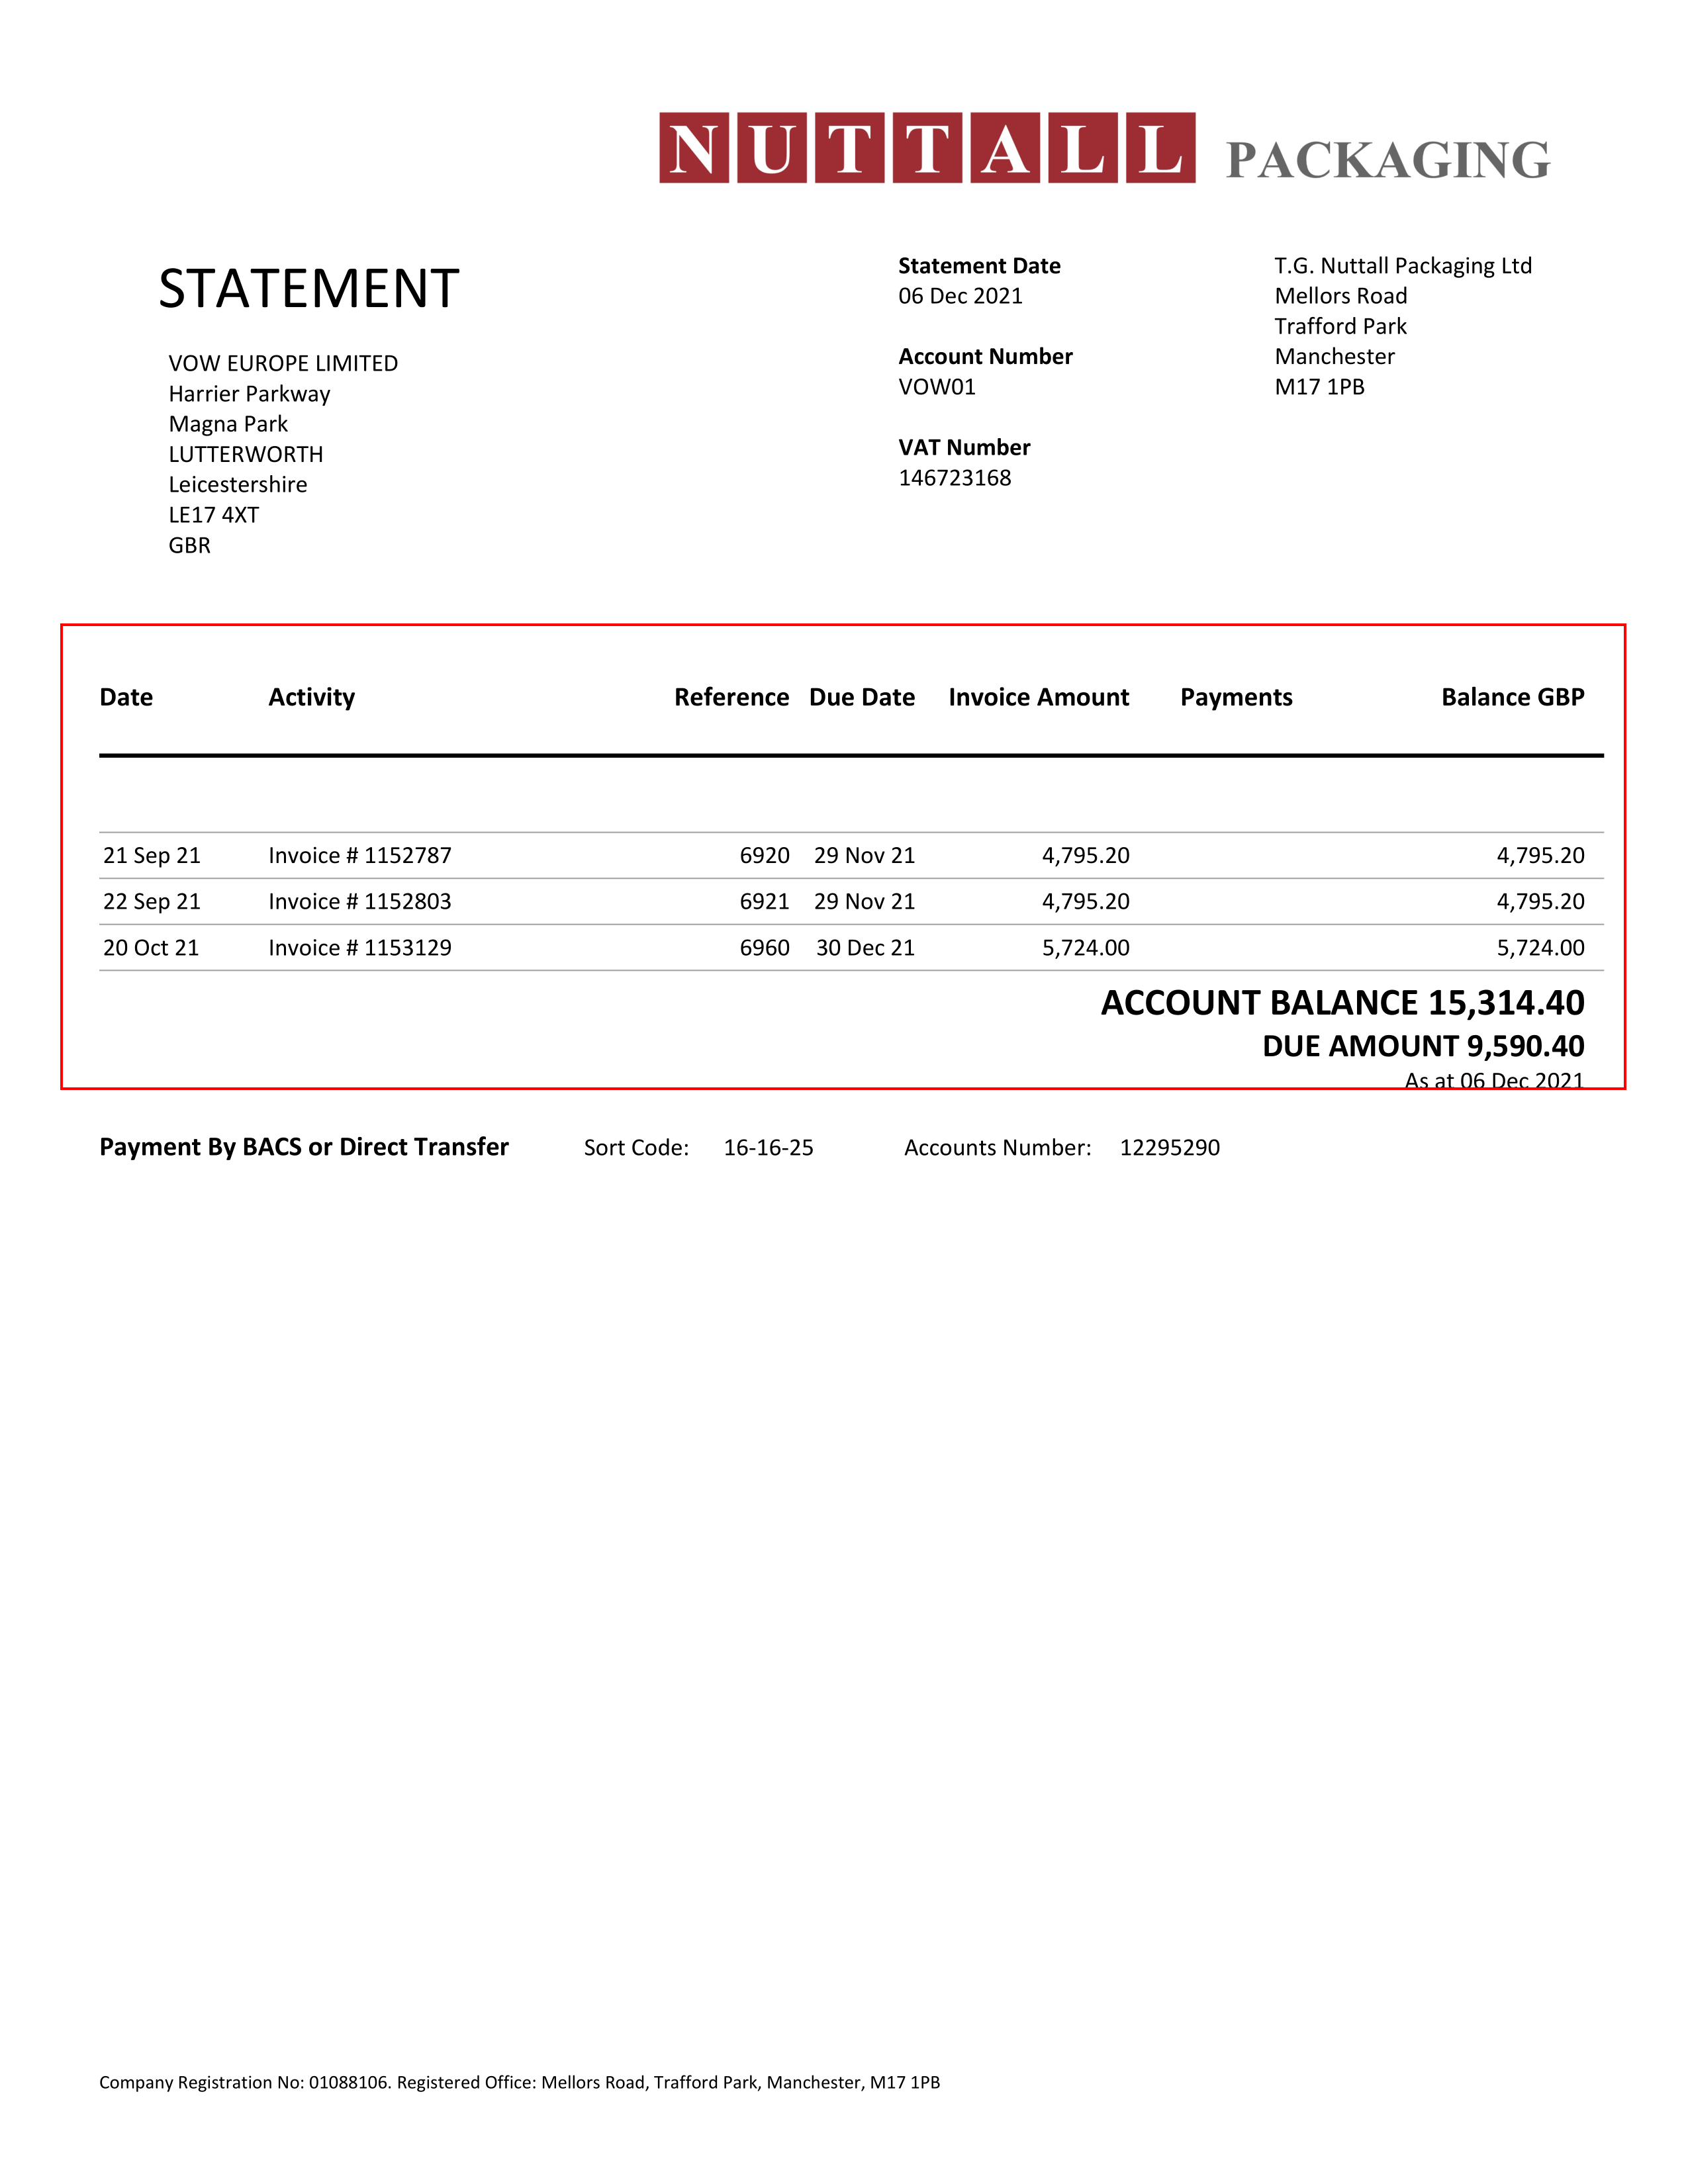

(2550, 3300)


In [30]:
from PIL import Image, ImageDraw


with Image.open(to_predict) as img:
    
    X_0 = min(X_coords) * img.size[0]/896
    X_1 = max(X_coords) * img.size[0]/896
    Y_0 = min(Y_coords) * img.size[1]/896
    Y_1 = max(Y_coords) * img.size[1]/896
    model_shape = [X_0, Y_0, X_1, Y_1]
    
    img1 = ImageDraw.Draw(img)  
    img1.rectangle(model_shape, outline ="red", width=4)
    display(img)
    print(img.size)